## Name: Ken Jin Chan
## Student ID: 45689768
## Portfolio url: https://github.com/MQCOMP2200-S2-2020/portfolio-2020-Ken-Jin05

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
from datetime import datetime as dt
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
combined = strava.join(cheetah, how='inner')
print(combined)

                           average_heartrate  average_temp  average_watts  \
2018-01-27 19:39:49+00:00              120.6          21.0          153.4   
2018-01-27 20:01:32+00:00              146.9          22.0          187.7   
2018-01-31 21:13:34+00:00              109.8          19.0          143.0   
2018-02-05 21:06:42+00:00              119.3          19.0          165.9   
2018-02-07 06:59:05+00:00              124.8          20.0          151.0   
...                                      ...           ...            ...   
2019-07-19 20:22:49+00:00                NaN           3.0          166.8   
2019-07-26 20:12:56+00:00              120.8           7.0          166.9   
2019-07-27 20:42:59+00:00              122.0           3.0          168.4   
2019-07-27 21:47:24+00:00              144.4           3.0          235.2   
2019-07-27 23:55:13+00:00              109.6          15.0          114.7   

                          device_watts  distance  elapsed_time elevation_ga

## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


# Question 1

In [5]:
measured = combined[combined.device_watts == True]
print(measured.head())

                           average_heartrate  average_temp  average_watts  \
2018-01-27 19:39:49+00:00              120.6          21.0          153.4   
2018-01-27 20:01:32+00:00              146.9          22.0          187.7   
2018-02-05 21:06:42+00:00              119.3          19.0          165.9   
2018-02-07 06:59:05+00:00              124.8          20.0          151.0   
2018-02-09 19:18:03+00:00              123.0          20.0          145.9   

                          device_watts  distance  elapsed_time elevation_gain  \
2018-01-27 19:39:49+00:00         True       7.6            17        95.00 m   
2018-01-27 20:01:32+00:00         True      38.6            67       449.00 m   
2018-02-05 21:06:42+00:00         True      24.3            69       439.00 m   
2018-02-07 06:59:05+00:00         True      47.1           144       890.00 m   
2018-02-09 19:18:03+00:00         True      59.8           193       656.00 m   

                           kudos  moving_time work

# Question 2

Text(0.5, 0, 'Moving Time')

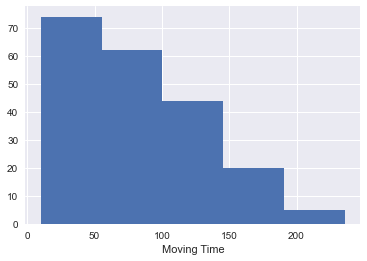

In [6]:
measured.moving_time.hist(histtype = 'stepfilled', bins = 5)
plt.xlabel('Moving Time')

Moving time is not normally distributed and it is right skewed.

Text(0.5, 0, 'Distance')

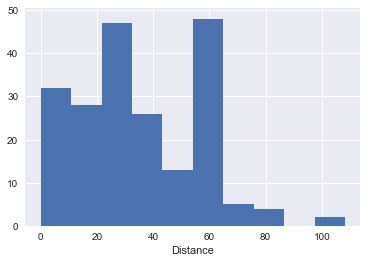

In [7]:
measured.distance.hist(histtype = 'stepfilled')
plt.xlabel('Distance')

Distance is not normally distributed and is right skewed. There is a possible outlier in the data as well.

Text(0.5, 0, 'Average speed')

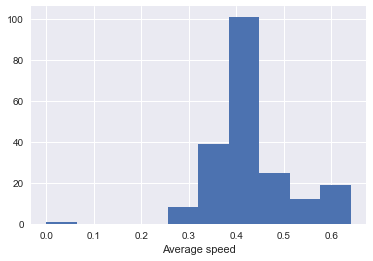

In [8]:
measured.loc[:,'average_speed'] = measured.distance/measured.moving_time # km travelled per minute
measured.average_speed.hist(histtype = 'stepfilled')
plt.xlabel('Average speed')

Average speed is not normally distributed and it is very left skewed. There is a possible outlier to be removed.

Text(0.5, 0, 'Average watts')

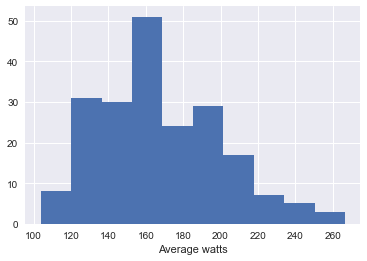

In [9]:
measured.average_watts.hist(histtype = 'stepfilled')
plt.xlabel('Average watts')

Average power is not normally distributed and it is right skewed.

Text(0.5, 0, 'TSS')

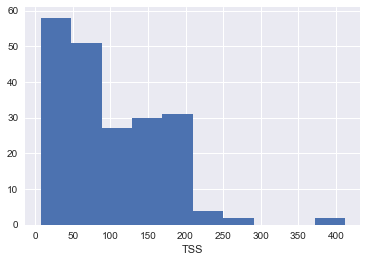

In [10]:
measured.TSS.hist(histtype = 'stepfilled')
plt.xlabel('TSS')

TSS is not normally distributed and very right skewed. This could be because of an possible outlier at the furthest end of the graph.

# Question 3

In [11]:
checking_correlation = measured[['distance', 'moving_time', 'average_speed', 'average_heartrate','average_watts', 'NP', 'TSS', 'Elevation Gain']]
checking_correlation.corr()

,distance,moving_time,average_speed,average_heartrate,average_watts,NP,TSS,Elevation Gain
distance,1.000000,0.972260,0.094233,0.078131,0.031858,0.202935,0.920085,0.804821
moving_time,0.972260,1.000000,-0.117681,-0.079929,-0.112507,0.092046,0.909389,0.826645
average_speed,0.094233,-0.117681,1.000000,0.707598,0.698640,0.506482,0.024166,-0.080399
average_heartrate,0.078131,-0.079929,0.707598,1.000000,0.672457,0.578104,0.080077,0.047363
average_watts,0.031858,-0.112507,0.698640,0.672457,1.000000,0.772574,0.150163,-0.100030
NP,0.202935,0.092046,0.506482,0.578104,0.772574,1.000000,0.425102,0.228622
TSS,0.920085,0.909389,0.024166,0.080077,0.150163,0.425102,1.000000,0.830574
Elevation Gain,0.804821,0.826645,-0.080399,0.047363,-0.100030,0.228622,0.830574,1.000000


From here, we can see that certain variables have correlation with each other and we will show it by using a heatmap.

[Text(0.5, 0, 'distance'),
 Text(1.5, 0, 'moving_time'),
 Text(2.5, 0, 'average_speed'),
 Text(3.5, 0, 'average_heartrate'),
 Text(4.5, 0, 'average_watts'),
 Text(5.5, 0, 'NP'),
 Text(6.5, 0, 'TSS'),
 Text(7.5, 0, 'Elevation Gain')]

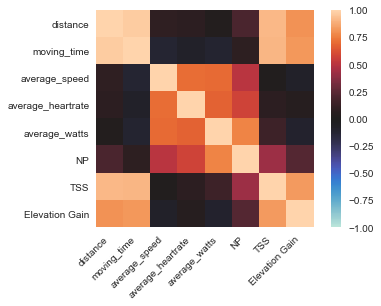

In [12]:
import seaborn as sns
corr = checking_correlation.corr()
ax = sns.heatmap(corr,
                vmin = -1,
                vmax = 1,
                center = 0,
                square = True)
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment = 'right')

We can see from the heatmap and the correlation talbe above that certain variables are possibly correlated such as :
- distance-moving_time
- distance-TSS
- distance-Elevation Gain
- moving_time-TSS
- moving_time-Elevation Gain
- average_speed-average_heartrate
- average_speed-average_watts
- average_heartrate-average_watts
- average_watts-NP
- TSS-Elevation Gain.

We will make the scatterplot below to check if this is actually true

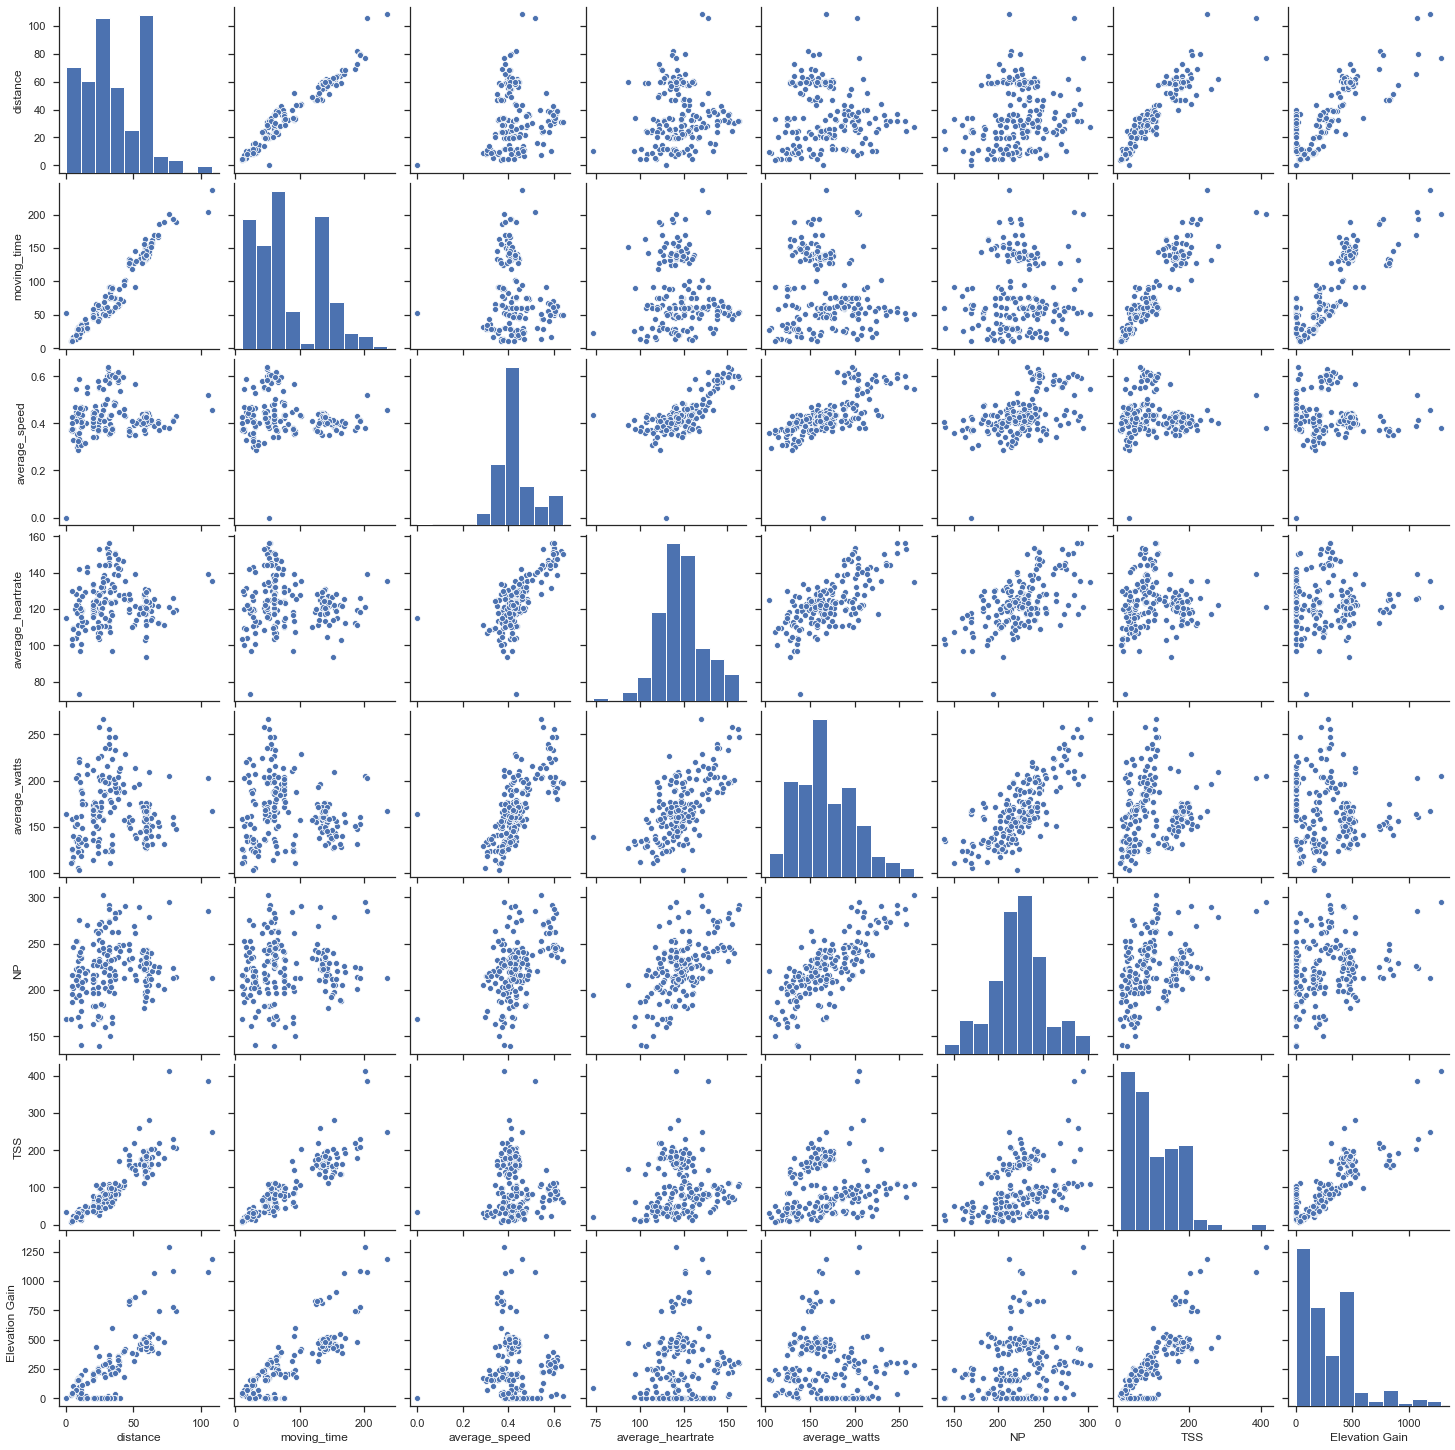

In [13]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(checking_correlation)

From what we can see here
- distance-moving_time has a positive correlation
- distance-TSS has a positive correlation with possible homoscedasticity
- distance-Elevation Gain may have a positive correlation with possible outliers
- moving_time-TSS has a positive correlation with possible homoscedasticity
- moving_time-Elevation Gain has a positive correlation with possible homoscedasticitiy
- average_speed-average_heartrate has a positive correlation
- average_speed-average_watts has a positive correlation with possible homoscedasticity
- average_heartrate-average_watts has a positive correlation
- average_watts-NP has a positive correlation
- TSS-Elevation Gain has positive correlation with possible outliers.

# Question 4

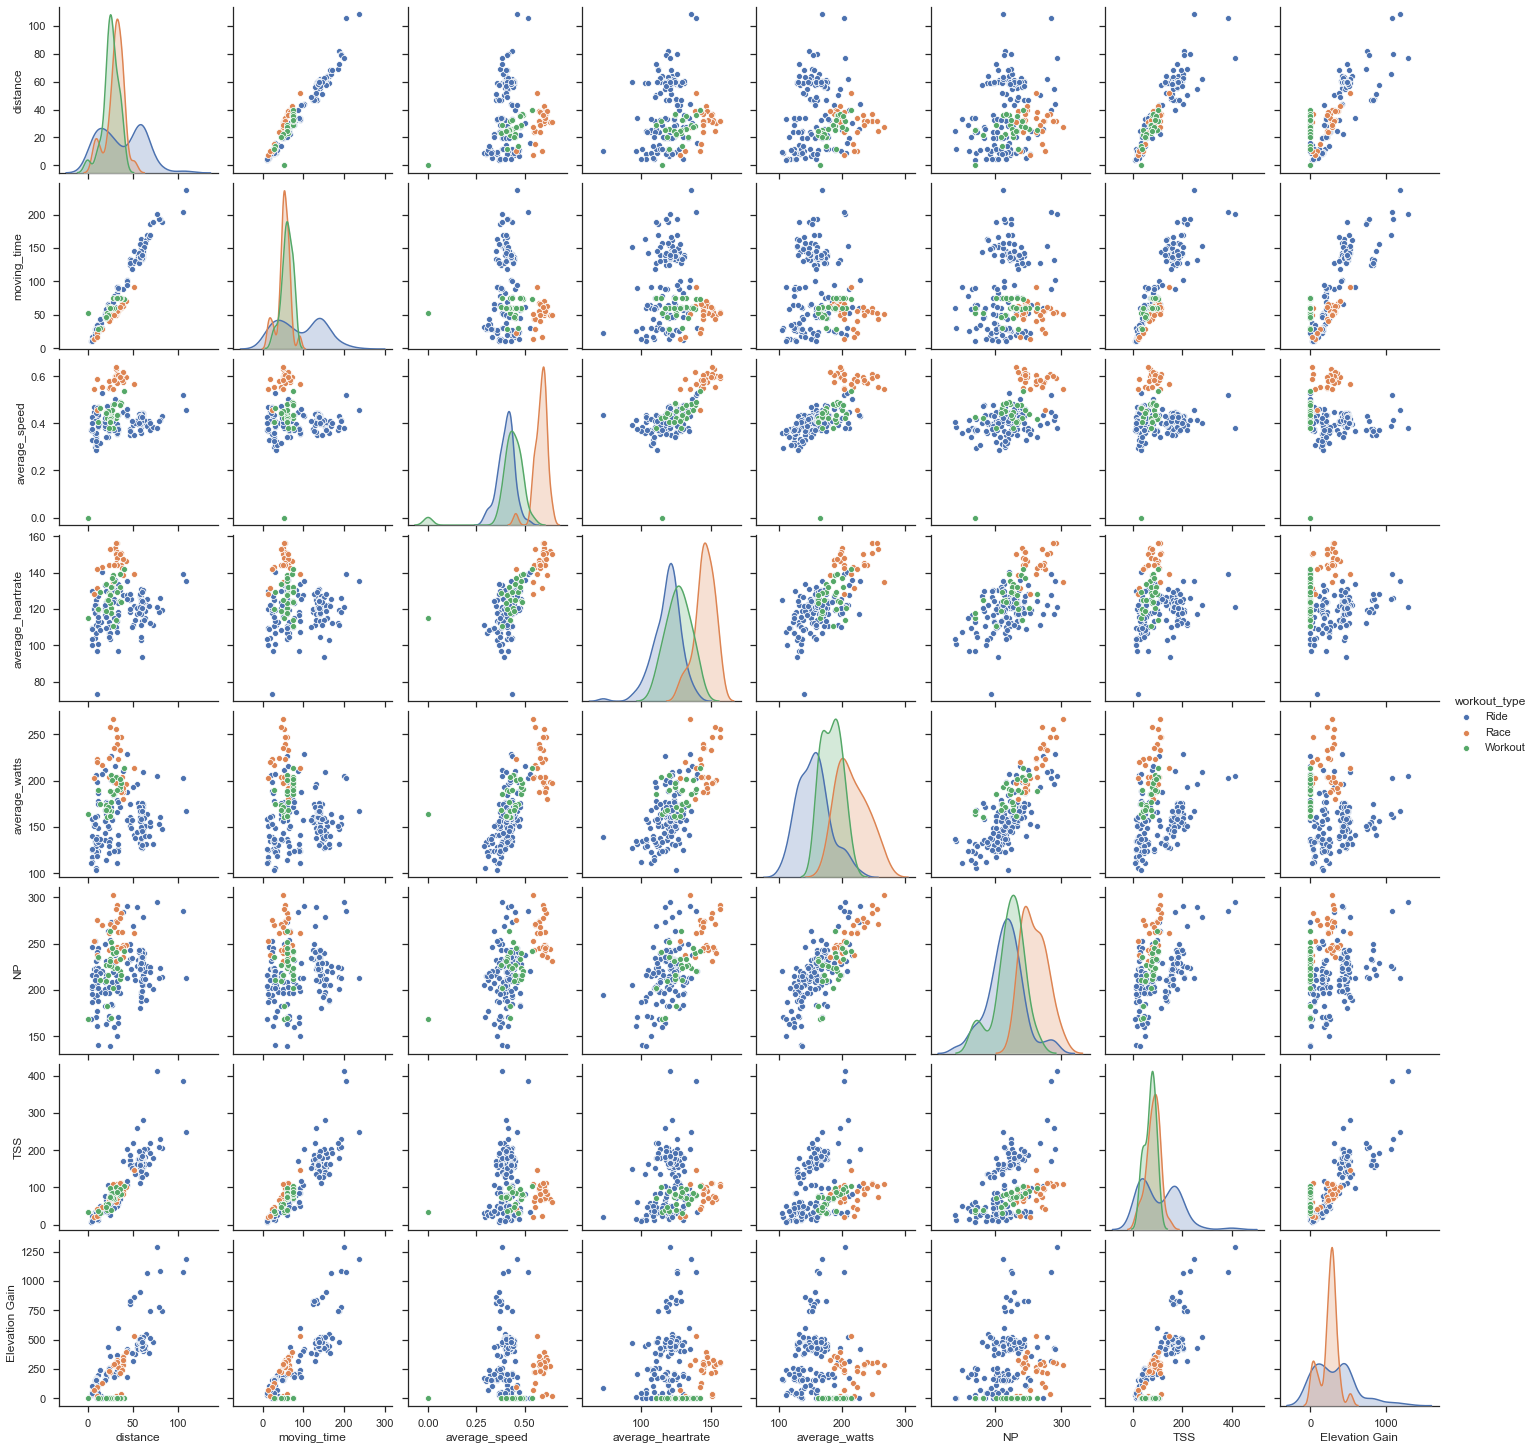

In [14]:
correlation_by_workout = measured[['distance', 'moving_time', 'average_speed', 'average_heartrate','average_watts', 'NP', 'TSS', 'Elevation Gain', 'workout_type']]
sns.pairplot(correlation_by_workout, hue="workout_type")

### distance - movingtime
We can see that for distance and moving time, ride has a longer distance travelled and longer moving time compared to race and workout which both have similar distance travelled and moving time. All of the workouts individually have positive linear relationships with a few possible outliers from the ride workout type.

### distance - average speed
We can see that for distance and average speed, ride has a longer distance travelled compared to race and workout which both have similar distance travelled. For the average speed, race is faster than workout and ride as this is a competition to see who finishes the fastest. It seems like none of the workout types have any linear relationships.

### distance - average heart rate
We can see that for distance and average heart rate, ride has a longer distance travelled compared to race and workout which both have similar distance travelled. For the average heart rate, race is faster than workout and ride as this is a competition to see who finishes the fastest. It seems like none of the workout types have any linear relationships.

### distance - average watts
We can see that for distance and average watts, ride has a longer distance travelled compared to race and workout which both have similar distance travelled. For the average watts, race is faster than workout and ride as this is a competition to see who finishes the fastest. It seems like none of the workout types have any linear relationships.

### distance - normalised power
We can see that for distance and normalised power, ride has a longer distance travelled compared to race and workout which both have similar distance travelled. For the normalised power, race is higher than workout and ride as this is a competition to see who finishes the fastest. It seems like none of the workout types have any linear relationships.

### distance - training stress score
We can see that for distance and tss, ride has a longer distance travelled compared to race and workout which both have similar distance travelled. For the training stress score, race and workout have a similar TSS while ride has a variation of TSS. This could be possibly be because of how hard or easy the ride is. Race and workout have positive linear relationships while ride has positive linear relationship with slight homoscedasticity. 

### distance - elevation gain
We can see that for distance and elevation gain, ride has a longer distance travelled compared to race and workout which both have similar distance travelled. For the elevation gain, race and ride have a similar elevation gain while workout seems to have no elevation gain. This could be possibly be because the workout is done at a specific place. Ride also has a variation of the elevation gain depending on how the road is like. Race has a positive linear relationships while ride and workout seems to have no linear relationships.

### moving time - average speed
We can see that for moving time and average speed, ride has a longer moving time compared to workout and race which have similar moving times. Race has a higher average speed compared to workout and ride due to the fact that it is a competition to see who finishes faster. There are no linear relationships for all of them.

### moving time - average heart rate
We can see that for moving time and heart rate, ride has a longer moving time compared to workout and race which have similar moving times. Race has a higher average heart race compared to workout and ride due to the fact that it is a competition to see who finishes faster. There are no linear relationships for all of them.

### moving time - average watts
We can see that for moving time and average watts, ride has a longer moving time compared to workout and race which have similar moving times. Race has a higher average watts compared to workout and ride due to the fact that it is a competition to see who finishes faster. There are no linear relationships for all of them.

### moving time - normalised power
We can see that for moving time and normalised power, ride has a longer moving time compared to workout and race which have similar moving times. Race has a higher normalised power compared to workout and ride due to the fact that it is a competition to see who finishes faster. There are no linear relationships for all of them.

### moving time - training stress score
We can see that for moving time and training stress score, ride has a longer moving time compared to workout and race which have similar moving times. Ride has a higher training stress score compared to workout and race. All 3 of the workout types have a positive linear relationship but ride has slight homoscedasticity.

### moving time - elevation gain
We can see that for moving time and elevation gain, ride has a longer moving time compared to workout and race which have similar moving times. Ride has higher elevation gain to workout and race. All 3 of the workout types have a positive linear relationship but ride has slight homoscedasticity.

### average speed - average heart rate
We can see that for average speed and average heart rate, race has a higher average speed followed by workout then ride. Race has a higher average heart rate followed by workout and ride. All 3 of the workout types have a positive linear relationship.

### average speed - average watts
We can see that for average speed and average watts, race has a higher average speed followed by workout then ride. Race has higher average watts followed by workout and ride. Ride and workout have positive linear relationships while race does not have any relationship.

### average speed - normalised power
We can see that for average speed and normalised power, race has a higher average speed followed by workout then ride. Race has higher normalised power while ride and workout are similar. There are no linear relationships for all of them.

### average speed - training stress score
We can see that for average speed and training stress score, race has a higher average speed followed by workout then ride. Ride has higher training stress score while race and workout are similar. Race and workout have slight positive linear relationship while ride has no linear relationship at all.

### average speed - elevation gain
We can see that for average speed and elevation gain, race has a higher average speed followed by workout then ride. Ride has higher elevation gain while race and workout are similar. There are no linear relationships for all of them.

### average heart rate - average watts
We can see that for average heart rate and average watts, race has a higher average heart rate while workout and ride are similar. Race has higher average watts followed by workout then ride. There are no linear relationships for all of them.

### average heart rate - normalised power
We can see that for average heart rate and normalised power, race has a higher average heart rate while workout and ride are similar. Race has higher normalised power followed by workout then ride. Ride and workout have positive linear relationship with possible homoscedasticity while race has no linear relationship.

### average heart rate - training stress score
We can see that for average heart rate and training stress score, race has a higher average heart rate while workout and ride are similar. Ride has higher training stress score while race and workout are similar. Race and workout have positive linear relationship while ride has no linear relationship.

### average heart rate - elevation gain
We can see that for average heart rate and elevation gain, race has a higher average heart rate while workout and ride are similar. Ride has higher elevation gain followed by race then workout. Race and workout have positive linear relationship while ride has no linear relationship.

### average watts - normalised power
We can see that for average watts and normalised power, race has a higher average watts while workout and ride are similar. Race has higher normalised power followed by workout then ride. All of them have positive linear relationships.

### average watts - training stress score
We can see that for average watts and training stress score, race has a higher average watts while workout and ride are similar. Ride has higher training stress score while race and workout are similar. Race and workout have positive linear relationship while ride has no linear relationship.

### average watts - elevation gain
We can see that for average watts and elevation gain, race has a higher average watts while workout and ride are similar. Ride has higher elevation gain followed by race then workout. All of them have positive linear relationships.

### normalised power - training stress score
We can see that for normalised power and training stress score, race has higher normalised power while rides have a varying normalised power and workout is slightly lower than race. Ride has higher training stress score while race and workout are similar. All of them have positive linear relationships with ride having possible homoscedasticity.

### normalised power - elevation gain
We can see that for normalised power and elevation gain, race has higher normalised power while rides have a varying normalised power and workout is slightly lower than race. Ride has higher elevation gain followed by race then workout. All of them have positive linear relationships with ride having possible homoscedasticity.

### training stress score - elevation gain
We can see that for training stress score and elevation gain, ride has higher training stress score while race and workout are similar. Ride has higher elevation gain followed by race then workout. Ride has positive linear relationship with possible homoscedasticity while race has positive linear relationship. Workout has no linear relationship.

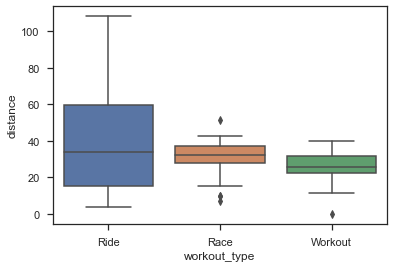

In [15]:
sns.boxplot(x = 'workout_type', y = 'distance', data = correlation_by_workout, orient = 'v')

For distance, median for all 3 workout types are about the same. Ride has a longer interquartile range and range than both race and workout. Race and workout have similar interquartile range and range with race being slightly higher.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002030789B970>,
      dtype=object)

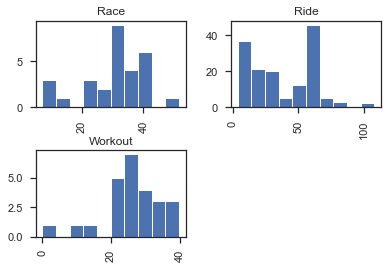

In [16]:
measured.distance.hist(by = measured['workout_type'])

Race has possible outliers are both sides. Ride is right skewed. Workout is heavily left skewed

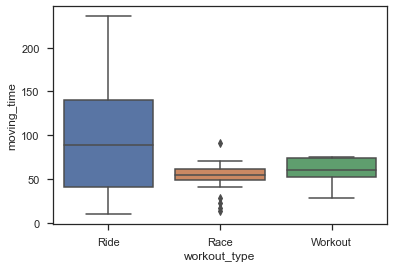

In [17]:
sns.boxplot(x = 'workout_type', y = 'moving_time', data = correlation_by_workout, orient = 'v')

For moving time, ride has higher median followed by workout then race. Ride has longest interquartile range followed by workout then race. For range, ride has the longest range while race and workout have similar maximum range but workout has a slightly shorter minimum range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203082867F0>,
      dtype=object)

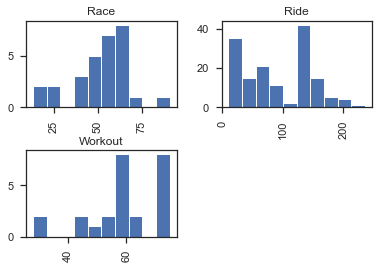

In [18]:
measured.moving_time.hist(by = measured['workout_type'])

Race is left skewed. Ride is right skewed. Workout is left skewed.

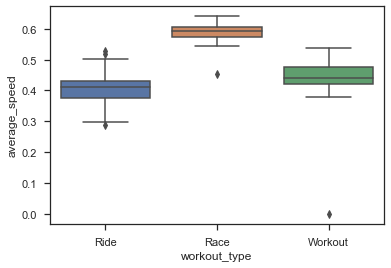

In [19]:
sns.boxplot(x = 'workout_type', y = 'average_speed', data = correlation_by_workout, orient = 'v')

For average speed, race has highest median followed by workout then ride. Interquartile range for race is the highest followed my workout then race. Range of race is higher than both workout and ride. Ride has a shorter minimum range compared to workout.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203082E3040>,
      dtype=object)

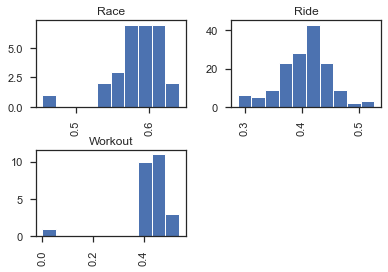

In [20]:
measured.average_speed.hist(by = measured['workout_type'])

Race is left skewed. Ride is normally distributed. Wokrout seems to have an outlier on the left side which affects the entire histogram.

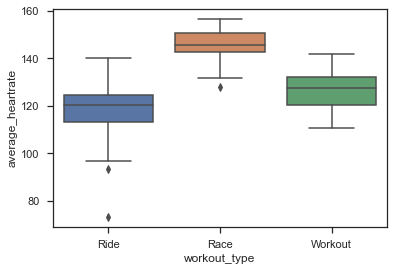

In [21]:
sns.boxplot(x = 'workout_type', y = 'average_heartrate', data = correlation_by_workout, orient = 'v')

For average heartrate, race has highest median followed by workout then ride. Interquartile range for race is the highest followed by ride then workout. Range for race is highest while ride and workout have similar maximum range but ride hahs lower minimum range than workout.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002030864ACD0>,
      dtype=object)

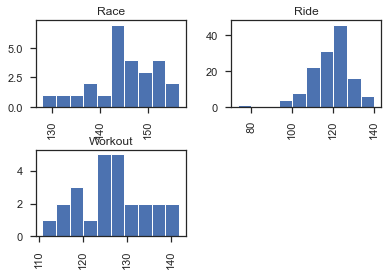

In [22]:
measured.average_heartrate.hist(by = measured['workout_type'])

Race is left skewed. Ride is left skewed. Workout is slightly ride skewed.

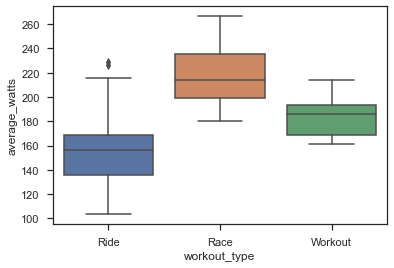

In [23]:
sns.boxplot(x = 'workout_type', y = 'average_watts', data = correlation_by_workout, orient = 'v')

For average watts, race has the highest median followed by workout then ride. Interquartile range for race is the highest followed by ride then workout. Range for race is highest while ride and workout have similar maximum range but ride hahs lower minimum range than workout.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203084F24C0>,
      dtype=object)

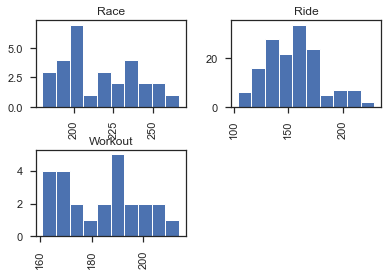

In [24]:
measured.average_watts.hist(by = measured['workout_type'])

Race is quite normally distributed with a little more data on the left side. Ride is normally distributed. Workout seems equally distributed as well.

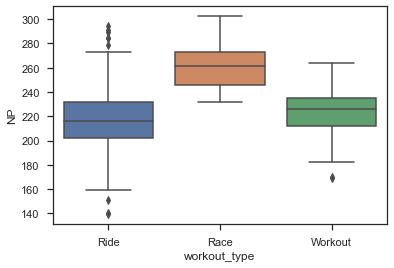

In [25]:
sns.boxplot(x = 'workout_type', y = 'NP', data = correlation_by_workout, orient = 'v')

For mormalised power, race has the highest median followed by workout then ride. Interquartile range for race is the highest followed by ride then workout. Range for race is highest while ride and workout have similar maximum range but ride hahs lower minimum range than workout.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002030876E2E0>,
      dtype=object)

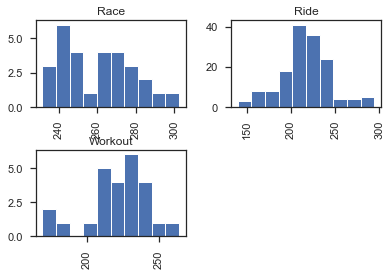

In [26]:
measured.NP.hist(by = measured['workout_type'])

Race is quite normally distributed with a little more data on the left side. Ride is normally distributed. Workout seems equally distributed as well.

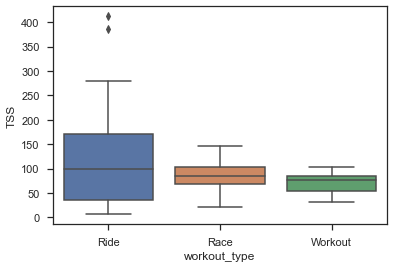

In [27]:
sns.boxplot(x = 'workout_type', y = 'TSS', data = correlation_by_workout, orient = 'v')

For training stress score, all the medians for each workout type are similar. Interquartile range for ride is the most varied while race and workout are similar. Range for ride is the highest followed my race and workout.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020308B70700>,
      dtype=object)

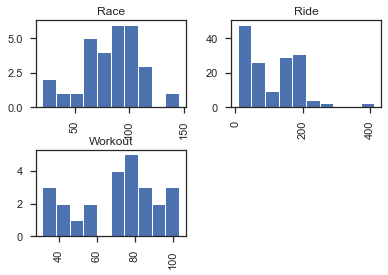

In [28]:
measured.TSS.hist(by = measured['workout_type'])

Race is quite normally distributed. Ride is left skewed because of an possible outlier. Workout seems to be right skewed.

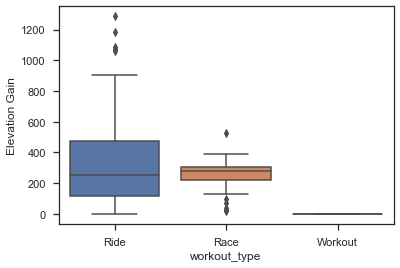

In [29]:
sns.boxplot(x = 'workout_type', y = 'Elevation Gain', data = correlation_by_workout, orient = 'v')

For elevation gain, race has highest median followed by ride then workout. Interquartile range for ride is most varied followed by race and workout. Range for ride is the highest followed by race and workout.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020307877430>,
      dtype=object)

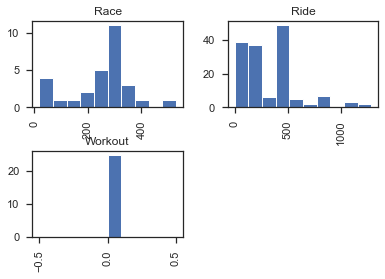

In [30]:
measured['Elevation Gain'].hist(by = measured['workout_type'])

Race seems to be slightly right skewed. Ride is heavily left skewed. Workout is normally distributed but it seems there is not enough data for it.

### I find the two variables average watts and normalised power interesting and i will explain why.

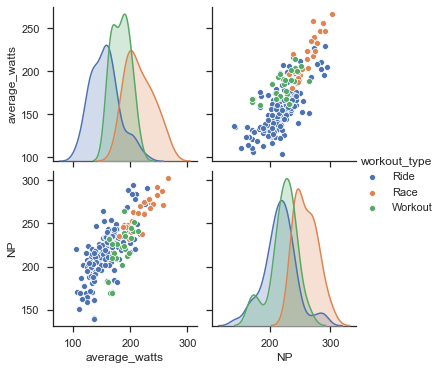

In [31]:
interesting = measured[['average_watts','NP', 'workout_type']]
sns.pairplot(interesting, hue = "workout_type")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020309FD9D60>,
      dtype=object)

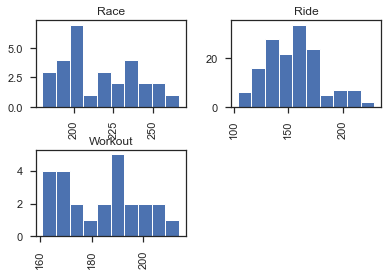

In [32]:
measured.average_watts.hist(by = measured['workout_type'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020309E0CFD0>,
      dtype=object)

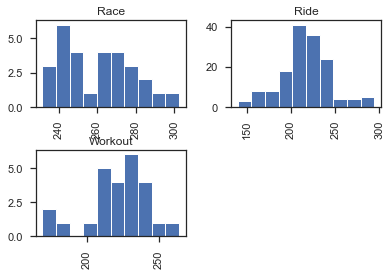

In [33]:
measured.NP.hist(by = measured['workout_type'])

From the pairplot, we can see that each workout type pretty much have normal distributions. We can also see that all the workout types have a positive linear relationship individually and combined as well. The histogram also has the better distribution compared to the rest of the variables. Therefore i conclude i find these 2 variables the most interesting to work with.

# Question 5

In [34]:
weather_2018 = pd.read_csv('data/weather_data_2018.csv', parse_dates= True)
weather_2019 = pd.read_csv('data/weather_data_2019.csv', parse_dates= True)

In [35]:
combined_weather = weather_2018.append(weather_2019)
combined_weather.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y
1,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y
2,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y
3,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y
4,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y


In [36]:
latest_weather = combined_weather.drop(['Product code', 'Bureau of Meteorology station number', 'Days of accumulation of maximum temperature', 'Quality'], axis = 1)
latest_weather.head()

,Year,Month,Day,Maximum temperature (Degree C)
0,2018,1,1,30.9
1,2018,1,2,28.8
2,2018,1,3,25.3
3,2018,1,4,25.4
4,2018,1,5,28.9


In [37]:
measured['date'] = pd.to_datetime(measured['date'])

In [38]:
measured['Year'] = measured['date'].dt.year
measured['Month'] = measured['date'].dt.month
measured['Day'] = measured['date'].dt.day
final = pd.merge(measured, latest_weather)
final.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest HF,HRV Recovery Points,NP,IF,TSS,average_speed,Year,Month,Day,Maximum temperature (Degree C)
0,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,222.856,0.83155,20.2257,0.447059,2018,1,28,30.7
1,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,245.365,0.91554,94.5787,0.576119,2018,1,28,30.7
2,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,253.702,0.94665,98.3269,0.373846,2018,2,6,28.2
3,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,232.644,0.86808,171.0780,0.351493,2018,2,7,28.1
4,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,212.726,0.79375,147.7970,0.430216,2018,2,10,30.3


### Relationship between distance and max temp

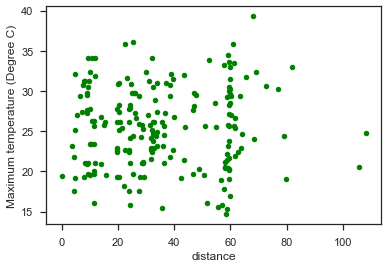

In [39]:
final.plot.scatter(x = 'distance', y = 'Maximum temperature (Degree C)', c='Green')

Distance and maximum temperature has no relationship between each other.

### Relationship between average speed and max temp

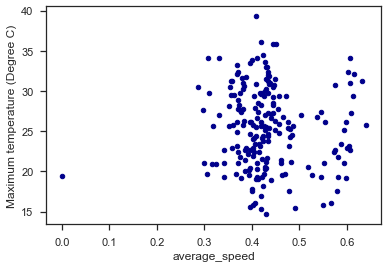

In [40]:
final.plot.scatter(x = 'average_speed', y = 'Maximum temperature (Degree C)', c='DarkBlue')

Average speed and maximum temperature has no relation with each other. There is a possible outlier.